# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Dataset = pd.read_excel("Data_Train.xlsx")
Dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
Dataset.describe

<bound method NDFrame.describe of            Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0           IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1        Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2      Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3           IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4           IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302
...            ...             ...       ...  ...         ...             ...    ...
10678     Air Asia       9/04/2019   Kolkata  ...    non-stop         No info   4107
10679    Air India      27/04/2019   Kolkata  ...    non-stop         No info   4145
10680  Jet Airways      27/04/2019  Banglore  ...    non-stop         No info   7229
10681      Vistara      01/03/2019  Banglore  ...    non-stop         No info  12648
10682    Air India       9/05/2

In [4]:
Dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
Dataset.dropna(inplace=True)
Dataset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
Dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

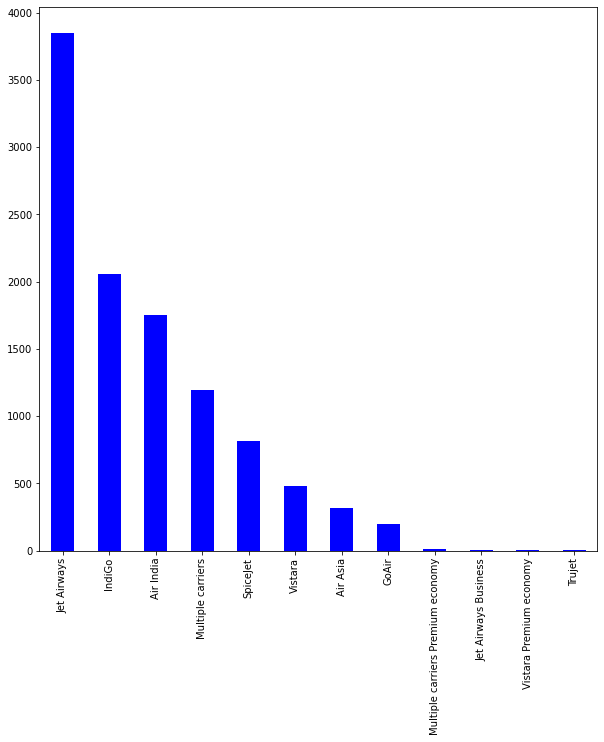

In [7]:
Dataset['Airline'].value_counts().plot(kind='bar',figsize=(10,10), color="b")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


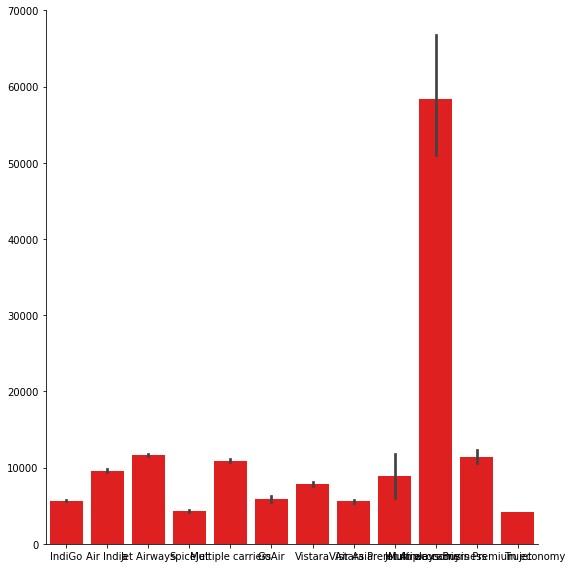

In [8]:
x=sns.FacetGrid(Dataset,size=8).map(sns.barplot,x=Dataset['Airline'],y=Dataset['Price'],color="red")

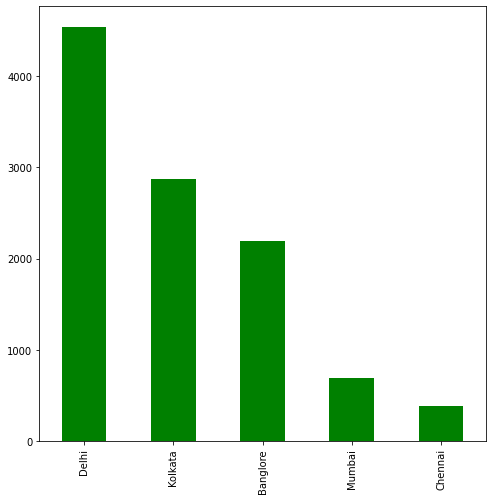

In [9]:
Dataset['Source'].value_counts().plot(kind="bar", figsize=(8,8), color="green")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


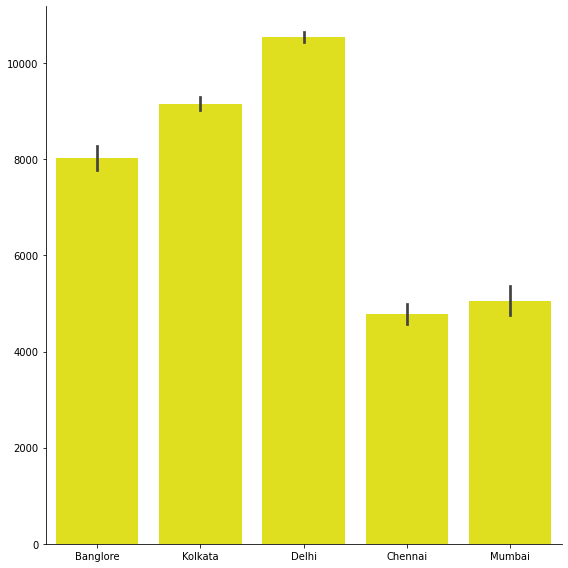

In [10]:
sns.FacetGrid(Dataset,size=8).map(sns.barplot,x=Dataset['Source'],y=Dataset['Price'], color="yellow")

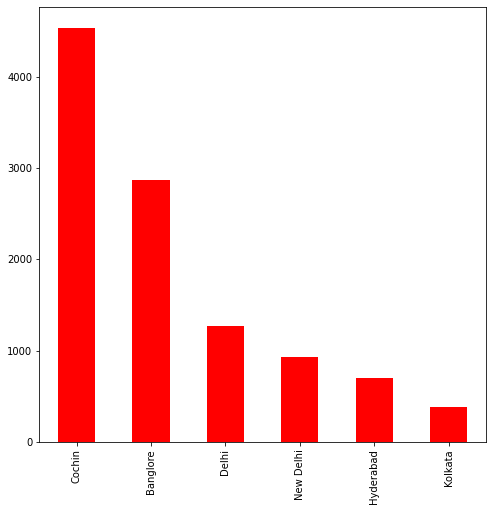

In [11]:
Dataset['Destination'].value_counts().plot(kind="bar", figsize=(8,8), color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


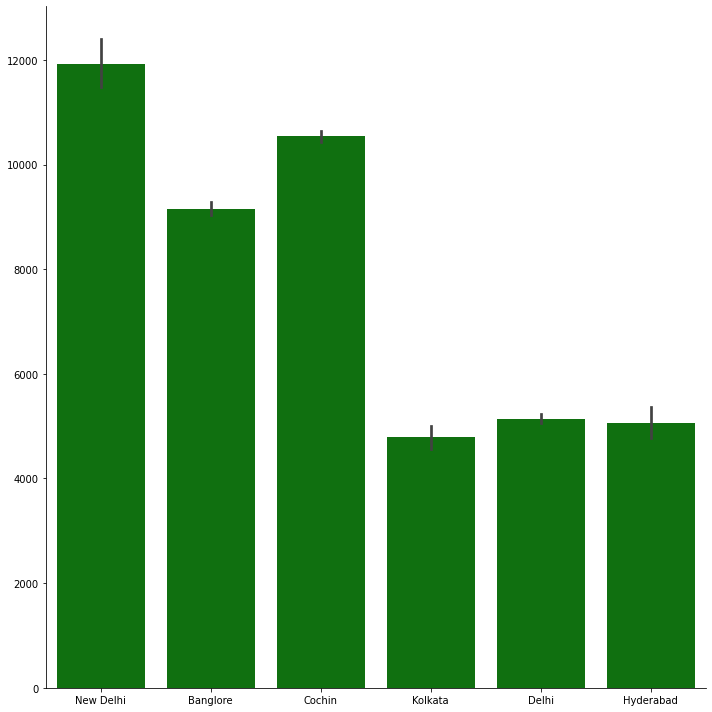

In [12]:
sns.FacetGrid(Dataset,size=10).map(sns.barplot,x=Dataset['Destination'],y=Dataset['Price'], color="green")

In [13]:
Dataset=pd.get_dummies(Dataset, columns=['Airline','Source','Destination'	],drop_first=True)
Dataset.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
Dataset['Day_of_Journey']=pd.to_datetime(Dataset['Date_of_Journey'],format="%d/%m/%Y").dt.day
Dataset['Month_of_Journey']=pd.to_datetime(Dataset['Date_of_Journey'],format='%d/%m/%Y').dt.month
Dataset['Arrival_Hour']=pd.to_datetime(Dataset['Arrival_Time']).dt.hour
Dataset['Arrival_Min']=pd.to_datetime(Dataset['Arrival_Time']).dt.minute
Dataset['Dep_Hour']=pd.to_datetime(Dataset['Dep_Time']).dt.hour
Dataset['Dep_Min']=pd.to_datetime(Dataset['Dep_Time']).dt.minute

Dataset.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Route','Additional_Info'], axis=1, inplace=True)
Dataset.head()

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,2h 50m,non-stop,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,1,10,22,20
1,7h 25m,2 stops,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,13,15,5,50
2,19h,2 stops,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,4,25,9,25
3,5h 25m,1 stop,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,23,30,18,5
4,4h 45m,1 stop,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,21,35,16,50


In [15]:
Dataset['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [16]:
def convertwordstoptoint(stops):
  Number_of_stops={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
  return Number_of_stops[stops]

In [17]:
Dataset["Total_Number_Stops"]=Dataset["Total_Stops"].apply(lambda x: convertwordstoptoint(x))
Dataset.head()

,Duration,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Total_Number_Stops
0,2h 50m,non-stop,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,1,10,22,20,0
1,7h 25m,2 stops,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,13,15,5,50,2
2,19h,2 stops,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,4,25,9,25,2
3,5h 25m,1 stop,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,23,30,18,5,1
4,4h 45m,1 stop,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,21,35,16,50,1


In [18]:
def fetch_Duration_hrs(Duration):
  if 'h' in Duration:
    Duration=Duration.split(sep = "h")[0]
    return Duration
  return 0


def fetch_Duration_mins(Duration):
  if 'm' in Duration:
    Duration=Duration.split(sep="m")[0].split()[-1]
    return Duration
  return 0

In [19]:
Dataset['Duration_Hrs']=Dataset['Duration'].apply(lambda x:fetch_Duration_hrs(x))
Dataset['Duration_mins']=Dataset['Duration'].apply(lambda x:fetch_Duration_mins(x))
Dataset.drop(['Duration','Total_Stops'], inplace=True, axis=1)
Dataset.head()

,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Total_Number_Stops,Duration_Hrs,Duration_mins
0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,1,10,22,20,0,2,50
1,7662,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,13,15,5,50,2,7,25
2,13882,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,9,6,4,25,9,25,2,19,0
3,6218,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,23,30,18,5,1,5,25
4,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,21,35,16,50,1,4,45


In [20]:
X=Dataset.iloc[:,1:]
y=Dataset['Price']

In [21]:
##Test Data

Dataset_test=pd.read_excel('Test_set.xlsx')

Dataset_test=pd.get_dummies(Dataset_test, columns=['Airline','Source','Destination'	],drop_first=True)

Dataset_test['Day_of_Journey']=pd.to_datetime(Dataset_test['Date_of_Journey'],format="%d/%m/%Y").dt.day
Dataset_test['Month_of_Journey']=pd.to_datetime(Dataset_test['Date_of_Journey'],format='%d/%m/%Y').dt.month
Dataset_test['Arrival_Hour']=pd.to_datetime(Dataset_test['Arrival_Time']).dt.hour
Dataset_test['Arrival_Min']=pd.to_datetime(Dataset_test['Arrival_Time']).dt.minute
Dataset_test['Dep_Hour']=pd.to_datetime(Dataset_test['Dep_Time']).dt.hour
Dataset_test['Dep_Min']=pd.to_datetime(Dataset_test['Dep_Time']).dt.minute

Dataset_test.drop(['Date_of_Journey','Arrival_Time','Dep_Time','Route','Additional_Info'], axis=1, inplace=True)

Dataset_test["Total_Number_Stops"]=Dataset_test["Total_Stops"].apply(lambda x: convertwordstoptoint(x))
Dataset_test['Duration_Hrs']=Dataset_test['Duration'].apply(lambda x:fetch_Duration_hrs(x))
Dataset_test['Duration_mins']=Dataset_test['Duration'].apply(lambda x:fetch_Duration_mins(x))
Dataset_test.drop(['Duration','Total_Stops'], inplace=True, axis=1)
Dataset_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Day_of_Journey,Month_of_Journey,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Total_Number_Stops,Duration_Hrs,Duration_mins
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,6,4,25,17,30,1,10,55
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12,5,10,20,6,20,1,4,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,19,0,19,15,1,23,45
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,21,5,21,0,8,0,1,13,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,24,6,2,45,23,55,0,2,50


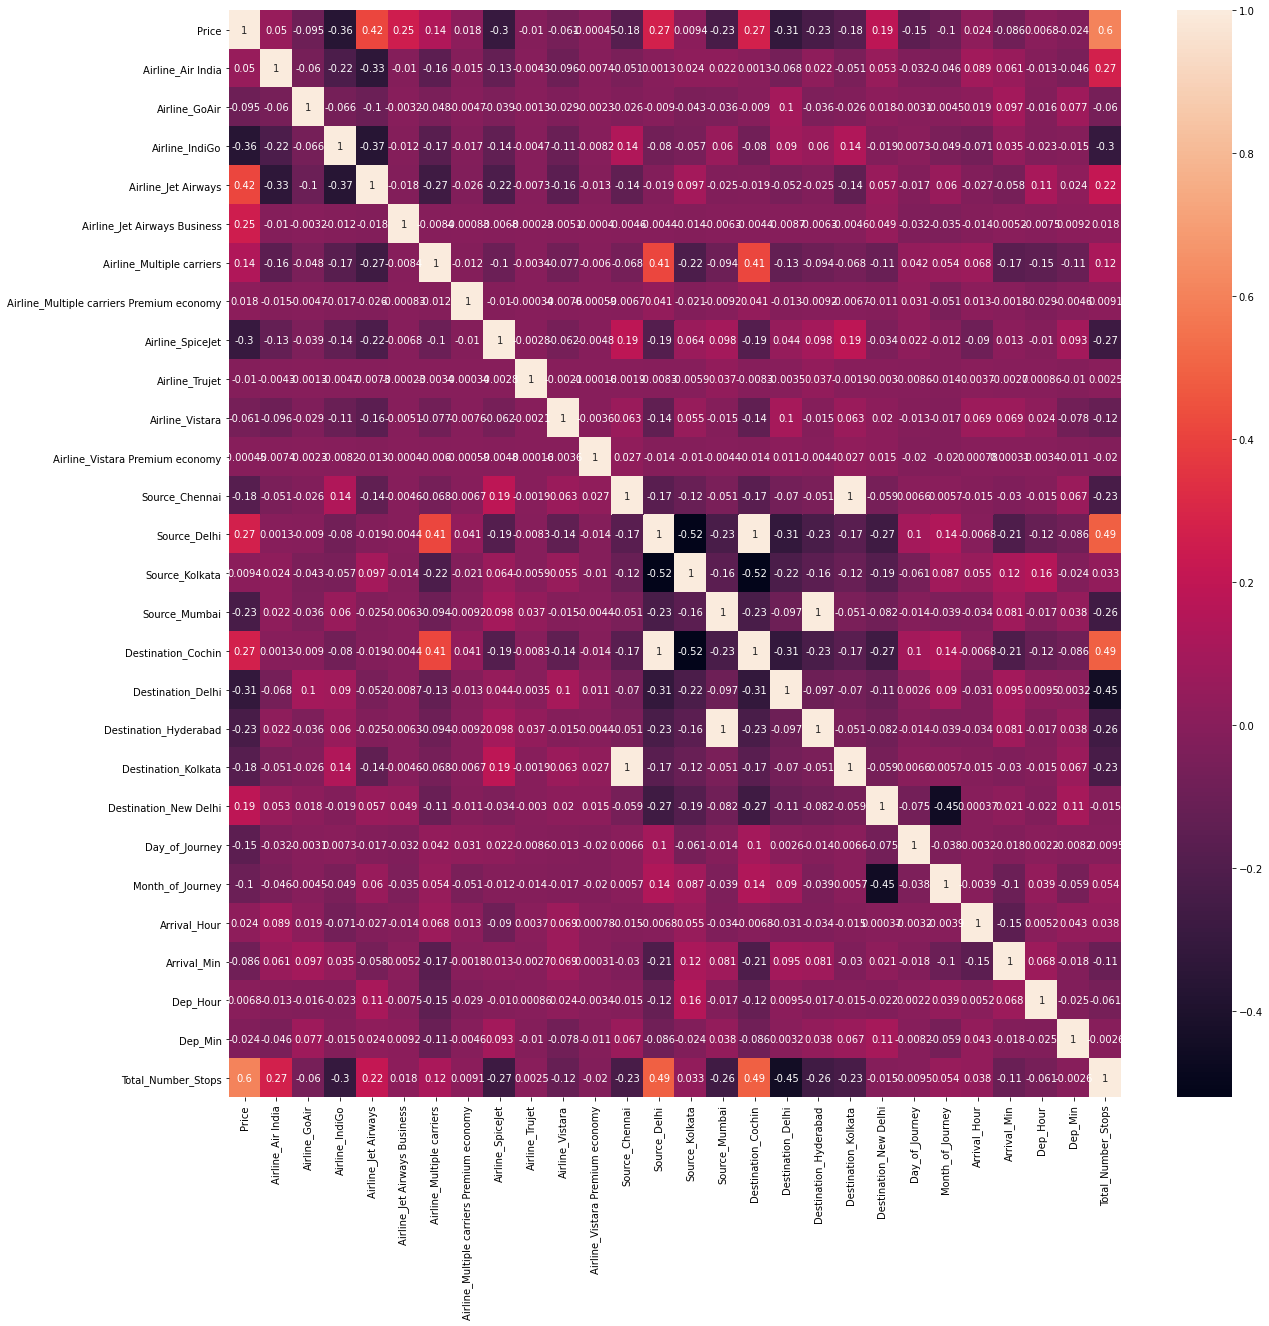

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
corrmat=Dataset.corr()
topfeatures=corrmat.index
sns.heatmap(Dataset[topfeatures].corr(),annot=True,cmap=None)
plt.show()

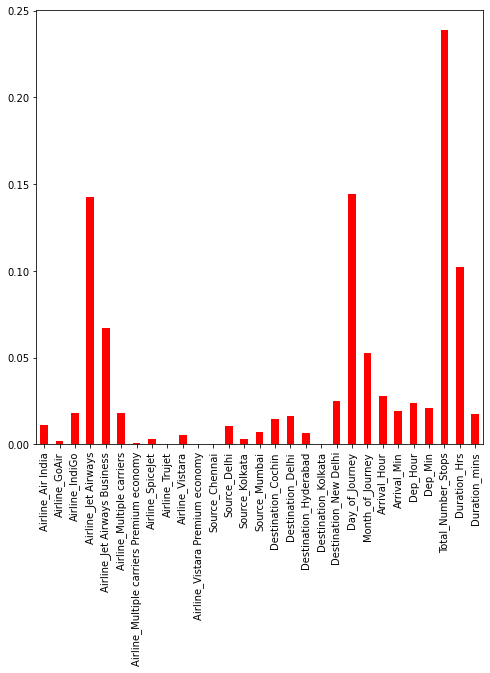

In [23]:
from sklearn.ensemble import ExtraTreesRegressor

extReg=ExtraTreesRegressor()
extReg.fit(X,y)
extReg.feature_importances_

plt.figure(figsize=(8,8))
Imp_feature=pd.Series(extReg.feature_importances_,index=X.columns )
Imp_feature.plot(kind="bar",color="red")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=10)]
criterion=['mse','mae']
max_depth=[5,10,20,30]
min_samples_split=[2,5,10,15,20,50]
min_samples_leaf=[1,2,5,10,20,50]
max_features=['auto','sqrt']

param_dist={'n_estimators':n_estimators,
            'criterion':criterion,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'max_features':max_features
            }

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=param_dist,cv=5,verbose=2)
rf_random.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae, total=  17.3s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.3s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae, total=  17.2s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae, total=  16.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae, total=  16.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, criterion=mae, total=  16.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=mae 
[CV]  n_estimators=200, min_samples_s

KeyboardInterrupt: ignored

In [122]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=100, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [123]:
rf_random.best_params_

{'criterion': 'mae',
 'max_depth': 5,
 'max_features': 'auto',
 'max_samples': 100,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 200}

In [172]:
rf_random.best_score_

0.49030807506169866

In [174]:
predt=rf_random.predict(test_x)

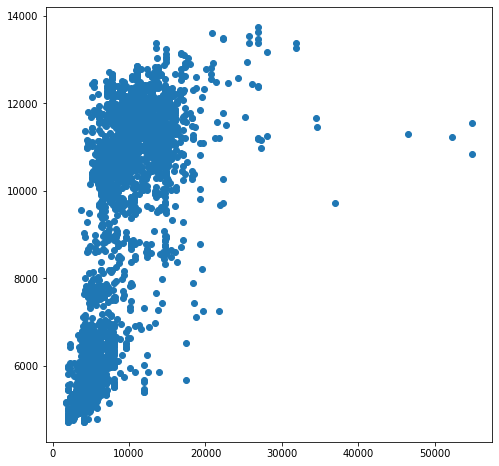

In [175]:
plt.figure(figsize=(8,8))
plt.scatter(test_y,predt)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


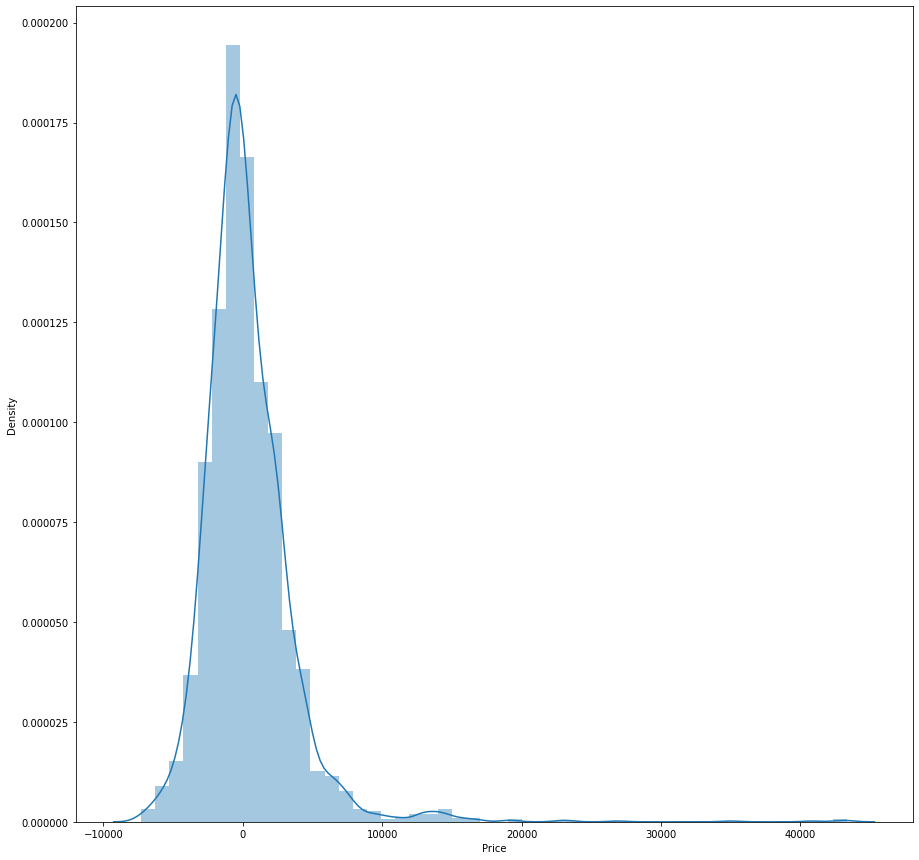

In [142]:
plt.figure(figsize=(15,15))
sns.distplot(test_y-predt)

In [129]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predt))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predt))

Mean Absolute Error: 2108.679996879875
Mean Squared Error: 10964533.258659817


In [176]:
metrics.r2_score(test_y, predt)

0.46672447884040513